In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
taxi_df=pd.read_csv("TaxiFare.csv")
taxi_df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [3]:
taxi_df.drop("unique_id",axis=1,inplace=True)

In [4]:
taxi_df.head(2)

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1


In [5]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount                50000 non-null  float64
 1   date_time_of_pickup   50000 non-null  object 
 2   longitude_of_pickup   50000 non-null  float64
 3   latitude_of_pickup    50000 non-null  float64
 4   longitude_of_dropoff  50000 non-null  float64
 5   latitude_of_dropoff   50000 non-null  float64
 6   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 2.7+ MB


In [6]:
taxi_df.isnull().sum()

amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [7]:
taxi_df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734371,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [8]:
taxi_df.dtypes

amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [9]:
for i in taxi_df.columns:
    print({i:taxi_df[i].unique()})

{'amount': array([ 4.5000e+00,  1.6900e+01,  5.7000e+00,  7.7000e+00,  5.3000e+00,
        1.2100e+01,  7.5000e+00,  1.6500e+01,  9.0000e+00,  8.9000e+00,
        5.5000e+00,  4.1000e+00,  7.0000e+00,  5.0000e+00,  1.2500e+01,
        4.0000e+00,  1.0500e+01,  1.1500e+01,  4.9000e+00,  6.1000e+00,
        7.3000e+00,  6.5000e+00,  9.3000e+00,  2.2540e+01,  3.1900e+01,
        1.8100e+01,  5.8000e+01,  9.8000e+00,  8.1000e+00,  1.0900e+01,
        1.7500e+01,  6.9000e+00,  3.3000e+00,  9.7000e+00,  8.0000e+00,
        2.5500e+01,  1.5300e+01,  3.4670e+01,  1.3700e+01,  8.5000e+00,
        3.7000e+00,  1.0100e+01,  1.5070e+01,  2.4900e+01,  1.7000e+01,
        1.2000e+01,  1.1000e+01,  1.3500e+01,  1.4000e+01,  1.0000e+01,
        1.4100e+01,  5.2000e+01,  1.1300e+01,  1.2900e+01,  9.5000e+00,
        3.5000e+01,  1.4500e+01,  3.2500e+01,  1.7700e+01,  1.9000e+01,
        4.9570e+01,  2.2500e+01,  5.2500e+01,  1.6000e+01,  1.7300e+01,
        2.1500e+01,  1.4900e+01,  3.5500e+01,  1.1700

In [10]:
taxi_df.date_time_of_pickup=pd.to_datetime(taxi_df.date_time_of_pickup)

In [11]:
taxi_df.head(2)

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1


In [12]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   amount                50000 non-null  float64            
 1   date_time_of_pickup   50000 non-null  datetime64[ns, UTC]
 2   longitude_of_pickup   50000 non-null  float64            
 3   latitude_of_pickup    50000 non-null  float64            
 4   longitude_of_dropoff  50000 non-null  float64            
 5   latitude_of_dropoff   50000 non-null  float64            
 6   no_of_passenger       50000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 2.7 MB


In [13]:
# extract the various data time components as seperate variables
taxi_df=taxi_df.assign(hour=taxi_df.date_time_of_pickup.dt.hour,
                      day=taxi_df.date_time_of_pickup.dt.day,
                      month=taxi_df.date_time_of_pickup.dt.month,
                      year=taxi_df.date_time_of_pickup.dt.year,
                      dayofweek=taxi_df.date_time_of_pickup.dt.dayofweek)

In [14]:
taxi_df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,dayofweek
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,17,15,6,2009,0
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,2010,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0,18,8,2011,3
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,4,21,4,2012,5
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,7,9,3,2010,1


In [15]:
taxi_df.drop("date_time_of_pickup",axis=1,inplace=True)

In [16]:
taxi_df.shape

(50000, 11)

In [19]:
taxi_df.drop(taxi_df[taxi_df["latitude_of_pickup"]>90].index, axis = 0, inplace = True)

In [20]:
from haversine import haversine, Unit
#df.apply(lambda x: func(x['col1'],x['col2']),axis=1)
#haversine((lat1,long1),(lat2,long2))
taxi_df['travel_dist_km']=taxi_df.apply(lambda row: haversine((row["latitude_of_pickup"],row["longitude_of_pickup"]),(row["latitude_of_dropoff"],row["longitude_of_dropoff"]),unit=Unit.KILOMETERS),axis=1)

In [21]:
taxi_df.shape

(49999, 12)

In [22]:
taxi_df.head(2)

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,dayofweek,travel_dist_km
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,17,15,6,2009,0,1.030765
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,2010,1,8.450145


In [23]:
taxi_df.columns

Index(['amount', 'longitude_of_pickup', 'latitude_of_pickup',
       'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger',
       'hour', 'day', 'month', 'year', 'dayofweek', 'travel_dist_km'],
      dtype='object')

In [25]:
taxi_df.drop(['longitude_of_pickup','latitude_of_pickup','longitude_of_dropoff', 'latitude_of_dropoff'],axis=1,inplace=True)

In [26]:
taxi_df.head()

,amount,no_of_passenger,hour,day,month,year,dayofweek,travel_dist_km
0,4.5,1,17,15,6,2009,0,1.030765
1,16.9,1,16,5,1,2010,1,8.450145
2,5.7,2,0,18,8,2011,3,1.389527
3,7.7,1,4,21,4,2012,5,2.799274
4,5.3,1,7,9,3,2010,1,1.999160


In [33]:
X=taxi_df.values[:,1:]
Y=taxi_df.values[:,0]

In [34]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X=scaler.fit_transform(X)
#scaler.fit(x)
#X=scaler.transform(x)
print(X)

[[-0.51804056  0.53955897 -0.07756474 ... -1.47064412 -1.54832431
  -0.04915532]
 [-0.51804056  0.38587657 -1.23222559 ... -0.93377059 -1.03731617
  -0.02828885]
 [ 0.25763954 -2.07304189  0.26883351 ... -0.39689706 -0.01529989
  -0.04814632]
 ...
 [-0.51804056 -1.45831227  1.65442653 ... -0.39689706  1.51772453
  -0.04568893]
 [ 0.25763954 -0.99726506 -1.1167595  ...  0.13997647 -1.03731617
  -0.05018331]
 [-0.51804056 -0.84358266 -0.30849691 ... -0.93377059 -0.52630803
  -0.05205427]]


In [36]:
from sklearn.model_selection import train_test_split

# split the data into test and train
X_train,X_test,Y_train,Y_test = train_test_split(X,Y ,test_size=0.3,random_state=10)


print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(34999, 7)
(34999,)
(15000, 7)
(15000,)


In [39]:
#prediciting using the Decision tree classifier

from sklearn.tree import DecisionTreeRegressor

model_DecisionTree=DecisionTreeRegressor(random_state=10)

#fit the model on the data and predicate the value

model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(X_test)
print(Y_pred)

[32.27 11.5   6.9  ...  4.9  13.   10.  ]


In [41]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squred:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squred: 0.46302471656098
RMSE: 6.880911417343878
Adj R-square: 0.4629495264870852


In [42]:
#prediciting using the Decision tree classifier

from sklearn.tree import DecisionTreeRegressor

model_DecisionTree=DecisionTreeRegressor(random_state=10,max_depth=5,min_samples_leaf=5)

#fit the model on the data and predicate the value

model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(X_test)
print(Y_pred)

[26.76097847 10.11057994  8.48542114 ...  5.45741668 10.11057994
 10.11057994]


In [43]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squred:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squred: 0.7570672308340326
RMSE: 4.6281973495544495
Adj R-square: 0.7570332141233415


In [45]:
print(list(zip(taxi_df.columns[1:],model_DecisionTree.feature_importances_)))

[('no_of_passenger', 0.0), ('hour', 0.0009640165746773458), ('day', 0.0), ('month', 0.0), ('year', 0.019447605884608796), ('dayofweek', 0.0005231557738411666), ('travel_dist_km', 0.9790652217668726)]


# generating the Decision_Tree

from sklearn import tree
with open(r"model_DecisionTree.txt", "w") as f:
    
    f = tree.export_graphviz(model_DecisionTree, feature_names=taxi_df.columns[1:],
                             out_file=f)
    
#generate the file and upload the code in webgraphviz.com to plot the decision tree


In [46]:
# puring Again

# Randam_forest_classifier

In [52]:
# predicting using the randm_forest_classifier
from sklearn.ensemble import RandomForestRegressor
model_RandomForsent=RandomForestRegressor(n_estimators=150,random_state=10,max_depth=5,min_samples_leaf=5)

# fit the model on the data and Predict  the value 
model_RandomForsent.fit(X_train,Y_train)
Y_pred=model_RandomForsent.predict(X_test)

In [53]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squred:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squred: 0.7631796703083948
RMSE: 4.569601303542138
Adj R-square: 0.7631465094932913


# Extra tress CLassifiers

In [70]:
# predicting using the Extra tress classifiers
from sklearn.ensemble import ExtraTreesRegressor
model_ExtraTree=ExtraTreesRegressor(n_estimators=60,random_state=10,)

# fit the model on the data and Predict  the value 
model_ExtraTree.fit(X_train,Y_train)
Y_pred=model_ExtraTree.predict(X_test)

In [55]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squred:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squred: 0.7089860789135715
RMSE: 5.065539441909493
Adj R-square: 0.7089453296297483


# ADaBoost_Classifier

In [57]:
#predicting using the AdaBoost_Classifier
from sklearn.ensemble import AdaBoostRegressor

model_AdaBoost=AdaBoostRegressor(base_estimator=
                                  DecisionTreeRegressor(random_state=10),
                                  n_estimators=100,
                                  random_state=10)
#fit the model on the data and predict the values
model_AdaBoost.fit(X_train,Y_train)
Y_pred=model_AdaBoost.predict(X_test)

In [58]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squred:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squred: 0.7593090896904098
RMSE: 4.606792633261396
Adj R-square: 0.7592753868964635


# KNN

In [59]:
#predicting using the KNeighbors_classifier
from  sklearn.neighbors import KNeighborsRegressor
model_KNN=KNeighborsRegressor(n_neighbors=int(np.sqrt(len(X_train))),metric="euclidean")
#euclidean,manhattan,minkawski
#fit the model on the data and predicate the value
model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[(26.5, 11.66582887700535), (6.5, 12.888770053475936), (6.5, 10.154010695187166), (8.1, 11.276684491978608), (3.5, 12.183957219251335), (14.1, 10.252192513368986), (13.5, 11.230962566844918), (4.0, 12.152566844919784), (5.7, 10.83192513368984), (8.5, 10.563636363636364), (9.0, 11.4851871657754), (6.5, 12.438983957219252), (10.0, 12.218395721925134), (6.0, 11.96181818181818), (5.7, 10.32427807486631), (8.0, 12.64385026737968), (28.0, 12.854010695187167), (5.3, 9.726363636363637), (9.5, 12.4927807486631), (11.7, 11.084652406417112), (12.0, 10.734545454545454), (7.5, 12.442299465240643), (9.3, 9.169893048128342), (11.5, 12.442192513368981), (37.7, 11.23245989304813), (12.5, 11.84417112299465), (11.5, 12.787967914438502), (4.5, 11.27475935828877), (10.0, 12.078342245989305), (12.9, 9.962834224598932), (8.9, 10.750374331550802), (22.5, 11.68711229946524), (12.9, 9.691443850267378), (11.0, 12.798288770053475), (6.5, 10.844010695187166), (10.5, 13.19812834224599), (15.3, 9.578288770053476), (

In [60]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squred:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squred: 0.009940366384951438
RMSE: 9.343282838280201
Adj R-square: 0.009801733082250963


<Figure size 2160x1080 with 0 Axes>

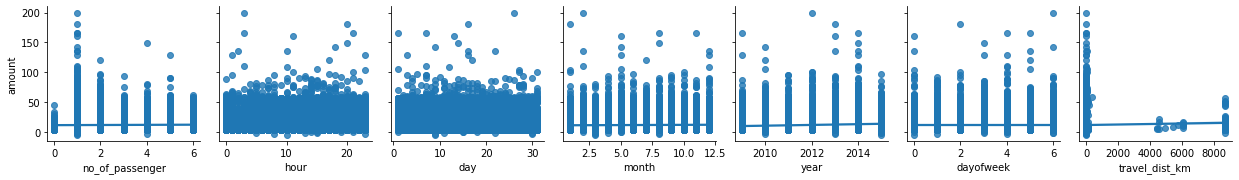

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
#Assumption 2:Assumption of Linearity:Every ind var should have a linear relationship with the dep var.
plt.figure(figsize=(30,15))
sns.pairplot(taxi_df,x_vars=taxi_df.columns[1:],y_vars="amount",
             kind='reg')
plt.show()





In [62]:
from sklearn.linear_model import LinearRegression
#create a model object
lm = LinearRegression()
#train the model object
lm.fit(X_train,Y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)



11.393614726244117
[ 0.14742874 -0.20699159 -0.01718736  0.38971794  1.27352934 -0.02668674
  0.17893236]


In [64]:
#predict using the model
Y_pred=lm.predict(X_test)
print(Y_pred)

[ 9.72047868 13.167876   10.50910229 ... 10.12056955 12.6704825
 12.4208236 ]


In [65]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squred:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squred: 0.013979439308959729
RMSE: 9.32420481126136
Adj R-square: 0.013841371578271477


# XGB Boost

In [67]:
from xgboost import XGBRegressor

In [68]:
model=XGBRegressor(n_estimators=100,random_state=10)
#fit the model on the data and predict the values
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

In [69]:
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squred:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squred: 0.7385234951722466
RMSE: 4.801590894437932
Adj R-square: 0.7384868818711765
